In [ ]:
# Genetic algorithm for f(x) = sin(x)+sin((10/3)*x) in [-10, 10]

In [66]:
import random as rnd
import numpy as np
import math as math
import matplotlib.pyplot as plt

In [120]:
iterasyon=20
crosover_rate=0.50
pop_size=4
gen_size=5

In [103]:
def create_chromosome():
    return clip([rnd.randint(0,1) for x in range(0,gen_size)])

def create_initial_population():
    return [create_chromosome() for x in range(0,pop_size)]

In [104]:
def func(x):
    x = int(round(x, 10))
    return math.sin(int(x)) + math.sin((10/3)*int(x))

In [105]:
def binaryToDec(cr): # converts binary number to decimal with first digit sign
    sayı = 0
    for i in range(1,gen_size):
        sayı += cr[gen_size - i] * 2**(i-1)
    if (cr[0] == 1): 
        sayı*=(-1)
    return sayı

In [106]:
def probability(fitness_values):
    P=[]
    total=sum(fitness_values)
    for f in fitness_values:
        P.append(f/total)
    return P

In [107]:
def crossover(p1,p2):
    o1=[]
    o2=[]
    c=rnd.randint(1,gen_size-1)
    print("Cut point:",c)
    o1[:c]=p2[:c]
    o1[c:]=p1[c:]
    
    o2[:c]=p1[:c]
    o2[c:]=p2[c:]
    
    return o1,o2

In [108]:
def mutation(mut):
    temp=[]
    temp=mut[:]
    gen=rnd.randint(0,1)
    index=rnd.randint(0,gen_size-1)
    temp[index]=gen
    return temp

In [109]:
def clip(cr): 
    if (binaryToDec(cr) < -10): return [1,1,0,1,0]
    elif (binaryToDec(cr) > 10): return [0,1,0,1,0]
    else: return cr

In [110]:
def mainProcess(fitness):
    history = []
    
    population=create_initial_population()
    fitness_values=[]

    for c in population:
        print("c: ", c)
        fitness_values.append(fitness(c))
    epok=0

    while epok<iterasyon:
        P=probability(fitness_values)

        C=np.cumsum(P)

        rulet_parents=[]

        for i in range(0,len(C)):
            r=rnd.random()
            print("Random:",r)
            for j in range(0,len(C)):
                if C[j]>r:
                    rulet_parents.append(j)
                    break


        for c, f,p in zip(population,fitness_values,P):
            print(c, " ",f," ",p)
        print(C)

        print(rulet_parents)

        crosover_parents=[]
        k=0
        while k<pop_size:
            r=rnd.random()
            if(r<crosover_rate):
                if(rulet_parents[k] not in crosover_parents):
                    crosover_parents.append(rulet_parents[k])
            k=k+1
        print("Individuals to be crossed over:",crosover_parents)


        if(len(crosover_parents)>=2):
            for i in range(0,len(crosover_parents)):
                for j in range (i+1, len(crosover_parents)):
                    o1,o2=crossover(population[crosover_parents[i]]
                            ,population[crosover_parents[j]])
                    population.append(o1)
                    population.append(o2)
                    print("o1: ", o1)
                    fitness_values.append(fitness(o1))
                    fitness_values.append(fitness(o2))

        else:
            print("Not enough individuals for crossover !!!")
        print("Population after crossover")
        for c, f in zip(population,fitness_values):
            print(c, " ",f )
        for r in range(0,5):
            mut=mutation(population[rnd.randint(0,len(population)-1)])

            population.append(mut)
            fitness_values.append(fitness(mut))

        print("Population after mutation")
        for c, f in zip(population,fitness_values):
            print(c, " ",f )

        zip_list=zip(fitness_values,population)

        sort_list=sorted(zip_list,reverse=True)

        for f,p in list(sort_list):
            print(f," ",p)

        p=len(population)

        while(p>pop_size):
            sort_list.pop()
            p=p-1
        print("After elitism")

        for f,p in list(sort_list):
            print(f," ",p)

        population=[]
        fitness_values=[]

        for f,p in list(sort_list):
            population.append(clip(p)) # clip işlemi yeni populasyonu oluştutururken
            fitness_values.append(f)
        epok+=1
        
        history.append(fitness_values[0]) # en iyi fitness değerini listede tutuyoruz

    print("The final population")
    for c, f in zip(population,fitness_values):
            print(c, " ",f )
    print("The best individual:",population[0], "decimal:", binaryToDec(population[0]), "fitness:",fitness_values[0])
    
    return history

In [111]:
def fitnessMax(cr):
    return round(func(binaryToDec(cr)) + 2, 10)

def fitnessMin(cr):
    return 1/(round(func(binaryToDec(cr)) + 2, 10) + 0.00000000001)

In [121]:
history_max = mainProcess(fitnessMax)

c:  [0, 0, 0, 0, 1]
c:  [0, 1, 0, 0, 1]
c:  [1, 1, 0, 1, 0]
c:  [0, 1, 0, 0, 1]
Random: 0.6928618267262187
Random: 0.9133075631392128
Random: 0.08684699033924126
Random: 0.3966205867751734
[0, 0, 0, 0, 1]   2.6509030219   0.37323161397290655
[0, 1, 0, 0, 1]   1.4240868611   0.20050308638790093
[1, 1, 0, 1, 0]   1.6034915343   0.22576221325129164
[0, 1, 0, 0, 1]   1.4240868611   0.20050308638790093
[0.37323161 0.5737347  0.79949691 1.        ]
[2, 3, 0, 1]
Caprazalnacak bireyler: [3, 0, 1]
Cut point: 2
o1:  [0, 0, 0, 0, 1]
Cut point: 4
o1:  [0, 1, 0, 0, 1]
Cut point: 3
o1:  [0, 1, 0, 0, 1]
crossover sonrasi populasyon
[0, 0, 0, 0, 1]   2.6509030219
[0, 1, 0, 0, 1]   1.4240868611
[1, 1, 0, 1, 0]   1.6034915343
[0, 1, 0, 0, 1]   1.4240868611
[0, 0, 0, 0, 1]   2.6509030219
[0, 1, 0, 0, 1]   1.4240868611
[0, 1, 0, 0, 1]   1.4240868611
[0, 1, 0, 0, 1]   1.4240868611
[0, 1, 0, 0, 1]   1.4240868611
[0, 0, 0, 0, 1]   2.6509030219
mutasyon sonrasi populasyon
[0, 0, 0, 0, 1]   2.6509030219
[0, 1,

In [122]:
history_min = mainProcess(fitnessMin)

c:  [0, 0, 0, 1, 0]
c:  [0, 1, 0, 1, 0]
c:  [0, 1, 0, 1, 0]
c:  [0, 0, 0, 1, 0]
Random: 0.5947020867660602
Random: 0.16622729647068057
Random: 0.5249086442519265
Random: 0.7131555601290422
[0, 0, 0, 1, 0]   0.3045578306038763   0.21096184476068705
[0, 1, 0, 1, 0]   0.4172737189575233   0.289038155239313
[0, 1, 0, 1, 0]   0.4172737189575233   0.289038155239313
[0, 0, 0, 1, 0]   0.3045578306038763   0.21096184476068705
[0.21096184 0.5        0.78903816 1.        ]
[2, 0, 2, 2]
Caprazalnacak bireyler: [0, 2]
Cut point: 3
o1:  [0, 1, 0, 1, 0]
crossover sonrasi populasyon
[0, 0, 0, 1, 0]   0.3045578306038763
[0, 1, 0, 1, 0]   0.4172737189575233
[0, 1, 0, 1, 0]   0.4172737189575233
[0, 0, 0, 1, 0]   0.3045578306038763
[0, 1, 0, 1, 0]   0.4172737189575233
[0, 0, 0, 1, 0]   0.3045578306038763
mutasyon sonrasi populasyon
[0, 0, 0, 1, 0]   0.3045578306038763
[0, 1, 0, 1, 0]   0.4172737189575233
[0, 1, 0, 1, 0]   0.4172737189575233
[0, 0, 0, 1, 0]   0.3045578306038763
[0, 1, 0, 1, 0]   0.41727371

[2.6509030219, 2.6509030219, 2.6509030219, 2.6509030219, 2.6509030219, 2.6509030219, 2.6509030219, 2.6509030219, 2.6509030219, 2.6509030219, 2.6509030219, 2.6509030219, 2.6509030219, 2.6509030219, 3.7773715278, 3.7773715278, 3.7773715278, 3.7773715278, 3.7773715278, 3.7773715278]


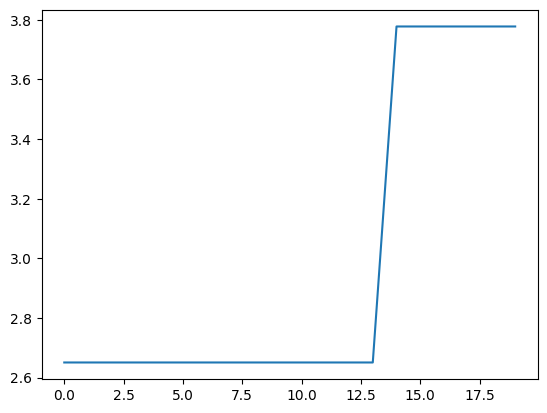

In [123]:
print(history_max)
plt.plot(history_max)
plt.show()

[0.6236390892018716, 0.6236390892018716, 88.32823924798163, 88.32823924798163, 88.32823924798163, 88.32823924798163, 88.32823924798163, 88.32823924798163, 88.32823924798163, 88.32823924798163, 88.32823924798163, 88.32823924798163, 88.32823924798163, 88.32823924798163, 88.32823924798163, 88.32823924798163, 88.32823924798163, 88.32823924798163, 88.32823924798163, 88.32823924798163]


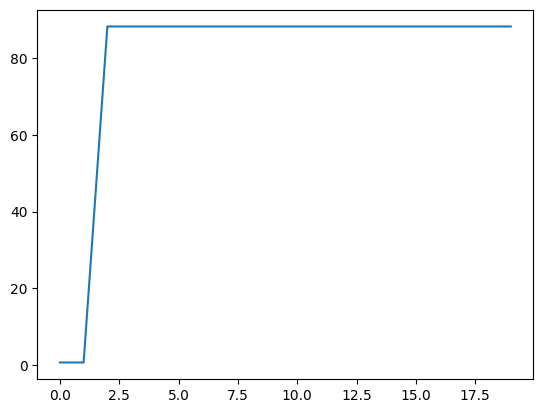

In [124]:
print(history_min)
plt.plot(history_min)
plt.show()